In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Feedback PNB1.csv')

In [ ]:
df

Reviwer Name  Helpful                                        Review Text  \
0            K        20  \nThe process was smooth and loan got sanction...   
1   Dilip Kumar        3  The PNB housing loan process was convenient bu...   
2       Rajeesh       28  My home loan was taken from PNB Housing but th...   
3       Bhimrao        3  I have taken a home loan with PNB HOUSING FINA...   
4        Prakas       13  I took a home loan with PNB Housing Finance Lt...   
..          ...      ...                                                ...   
94    SRINIVAS         0  The rate of interest with PNB HOUSING FINANCE ...   
95    DEEPAK BA        3  I have taken my home loan with PNB. The proces...   
96   Vikas Garg        1  1) It's mandatory to buy insurance. 2) Custome...   
97     MANISH M        1  The process took more than one month for my ho...   
98    HEMANT SA        1  I can say to others about the PNB housing fina...   

    Rating         Summary   Review Time      Location  
0       5.0   Good Service  Jan 30, 2020    Coimbatore  
1       4.0      Excellent  Aug 26, 2019     Bangalore  
2       2.0  Expected More  Jan 16, 2020     Hyderabad  
3       4.0          Great  Nov 08, 2019    Aurangabad  
4       4.0          Great  Sep 29, 2019      Palakkad  
..      ...            ...           ...           ...  
94      2.0  Expected More  Oct 10, 2017  Secunderabad  
95      4.0          Great  Aug 30, 2018     Ghaziabad  
96      1.5            Bad  Dec 16, 2016     Ghaziabad  
97      3.0   Satisfactory  Oct 04, 2016     Ghaziabad  
98      3.0   Satisfactory  Mar 09, 2016     Ghaziabad  

[99 rows x 7 columns]

In [ ]:
df.head()

Reviwer Name  Helpful                                        Review Text  \
0           K        20  \nThe process was smooth and loan got sanction...   
1  Dilip Kumar        3  The PNB housing loan process was convenient bu...   
2      Rajeesh       28  My home loan was taken from PNB Housing but th...   
3      Bhimrao        3  I have taken a home loan with PNB HOUSING FINA...   
4       Prakas       13  I took a home loan with PNB Housing Finance Lt...   

   Rating         Summary   Review Time    Location  
0      5.0   Good Service  Jan 30, 2020  Coimbatore  
1      4.0      Excellent  Aug 26, 2019   Bangalore  
2      2.0  Expected More  Jan 16, 2020   Hyderabad  
3      4.0          Great  Nov 08, 2019  Aurangabad  
4      4.0          Great  Sep 29, 2019    Palakkad

In [ ]:
df.size

693

In [ ]:
df.index

RangeIndex(start=0, stop=99, step=1)

In [ ]:
df.isnull().sum()

Reviwer Name    0
Helpful         0
Review Text     0
Rating          0
Summary         0
Review Time     0
Location        0
dtype: int64

In [ ]:
df['Reviews']=df['Review Text']+df['Summary']
df=df.drop(['Review Text','Summary'],axis=1)
df.head()

Reviwer Name  Helpful  Rating    Review Time    Location  \
0           K        20      5.0  Jan 30, 2020  Coimbatore   
1  Dilip Kumar        3      4.0  Aug 26, 2019   Bangalore   
2      Rajeesh       28      2.0  Jan 16, 2020   Hyderabad   
3      Bhimrao        3      4.0  Nov 08, 2019  Aurangabad   
4       Prakas       13      4.0  Sep 29, 2019    Palakkad   

                                             Reviews  
0  \nThe process was smooth and loan got sanction...  
1  The PNB housing loan process was convenient bu...  
2  My home loan was taken from PNB Housing but th...  
3  I have taken a home loan with PNB HOUSING FINA...  
4  I took a home loan with PNB Housing Finance Lt...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviwer Name  99 non-null     object 
 1   Helpful       99 non-null     int64  
 2   Rating        99 non-null     float64
 3   Review Time   99 non-null     object 
 4   Location      99 non-null     object 
 5   Reviews       99 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df['Rating '].value_counts()

4.0    26
3.0    23
5.0    14
1.0    13
2.0     6
4.5     5
3.5     4
2.5     3
0.5     3
1.5     2
Name: Rating , dtype: int64

In [ ]:
def f(sent):
    if sent['Rating ']==3.0 or sent['Rating ']==2.5:
        val='Neutral'
    elif sent['Rating ']==3.5 or sent['Rating ']==4.0 or sent['Rating ']==4.5 or sent['Rating ']==5.0:
        val='Positive'
    elif sent['Rating ']==0.5 or sent['Rating ']==1.0 or sent['Rating ']==1.5 or sent['Rating ']==2.0:
        val='Negative'
    else:
        val=-1
    return val
    

In [ ]:
df['sentiment']= df.apply(f, axis=1)
df.head()

Reviwer Name  Helpful  Rating    Review Time    Location  \
0           K        20      5.0  Jan 30, 2020  Coimbatore   
1  Dilip Kumar        3      4.0  Aug 26, 2019   Bangalore   
2      Rajeesh       28      2.0  Jan 16, 2020   Hyderabad   
3      Bhimrao        3      4.0  Nov 08, 2019  Aurangabad   
4       Prakas       13      4.0  Sep 29, 2019    Palakkad   

                                             Reviews sentiment  
0  \nThe process was smooth and loan got sanction...  Positive  
1  The PNB housing loan process was convenient bu...  Positive  
2  My home loan was taken from PNB Housing but th...  Negative  
3  I have taken a home loan with PNB HOUSING FINA...  Positive  
4  I took a home loan with PNB Housing Finance Lt...  Positive

In [ ]:
df['sentiment'].value_counts()

Positive    49
Neutral     26
Negative    24
Name: sentiment, dtype: int64

In [ ]:
new=df['Review Time'].str.split(",",n=1,expand=True)
df['Date']=new[0]
df['Year']=new[1]
df.head()


Reviwer Name  Helpful  Rating    Review Time    Location  \
0           K        20      5.0  Jan 30, 2020  Coimbatore   
1  Dilip Kumar        3      4.0  Aug 26, 2019   Bangalore   
2      Rajeesh       28      2.0  Jan 16, 2020   Hyderabad   
3      Bhimrao        3      4.0  Nov 08, 2019  Aurangabad   
4       Prakas       13      4.0  Sep 29, 2019    Palakkad   

                                             Reviews sentiment    Date   Year  
0  \nThe process was smooth and loan got sanction...  Positive  Jan 30   2020  
1  The PNB housing loan process was convenient bu...  Positive  Aug 26   2019  
2  My home loan was taken from PNB Housing but th...  Negative  Jan 16   2020  
3  I have taken a home loan with PNB HOUSING FINA...  Positive  Nov 08   2019  
4  I took a home loan with PNB Housing Finance Lt...  Positive  Sep 29   2019

In [ ]:
df.drop(['Review Time'],axis=1)
df

Reviwer Name  Helpful  Rating    Review Time      Location  \
0            K        20      5.0  Jan 30, 2020    Coimbatore   
1   Dilip Kumar        3      4.0  Aug 26, 2019     Bangalore   
2       Rajeesh       28      2.0  Jan 16, 2020     Hyderabad   
3       Bhimrao        3      4.0  Nov 08, 2019    Aurangabad   
4        Prakas       13      4.0  Sep 29, 2019      Palakkad   
..          ...      ...      ...           ...           ...   
94    SRINIVAS         0      2.0  Oct 10, 2017  Secunderabad   
95    DEEPAK BA        3      4.0  Aug 30, 2018     Ghaziabad   
96   Vikas Garg        1      1.5  Dec 16, 2016     Ghaziabad   
97     MANISH M        1      3.0  Oct 04, 2016     Ghaziabad   
98    HEMANT SA        1      3.0  Mar 09, 2016     Ghaziabad   

                                              Reviews sentiment    Date   Year  
0   \nThe process was smooth and loan got sanction...  Positive  Jan 30   2020  
1   The PNB housing loan process was convenient bu...  Positive  Aug 26   2019  
2   My home loan was taken from PNB Housing but th...  Negative  Jan 16   2020  
3   I have taken a home loan with PNB HOUSING FINA...  Positive  Nov 08   2019  
4   I took a home loan with PNB Housing Finance Lt...  Positive  Sep 29   2019  
..                                                ...       ...     ...    ...  
94  The rate of interest with PNB HOUSING FINANCE ...  Negative  Oct 10   2017  
95  I have taken my home loan with PNB. The proces...  Positive  Aug 30   2018  
96  1) It's mandatory to buy insurance. 2) Custome...  Negative  Dec 16   2016  
97  The process took more than one month for my ho...   Neutral  Oct 04   2016  
98  I can say to others about the PNB housing fina...   Neutral  Mar 09   2016  

[99 rows x 9 columns]

In [ ]:
new1=df['Date'].str.split(" ",n=1,expand=True)
df['Month']=new1[0]
df['Day']=new1[1]
df.drop(['Date'],axis=1)

Reviwer Name  Helpful  Rating    Review Time      Location  \
0            K        20      5.0  Jan 30, 2020    Coimbatore   
1   Dilip Kumar        3      4.0  Aug 26, 2019     Bangalore   
2       Rajeesh       28      2.0  Jan 16, 2020     Hyderabad   
3       Bhimrao        3      4.0  Nov 08, 2019    Aurangabad   
4        Prakas       13      4.0  Sep 29, 2019      Palakkad   
..          ...      ...      ...           ...           ...   
94    SRINIVAS         0      2.0  Oct 10, 2017  Secunderabad   
95    DEEPAK BA        3      4.0  Aug 30, 2018     Ghaziabad   
96   Vikas Garg        1      1.5  Dec 16, 2016     Ghaziabad   
97     MANISH M        1      3.0  Oct 04, 2016     Ghaziabad   
98    HEMANT SA        1      3.0  Mar 09, 2016     Ghaziabad   

                                              Reviews sentiment   Year Month  \
0   \nThe process was smooth and loan got sanction...  Positive   2020   Jan   
1   The PNB housing loan process was convenient bu...  Positive   2019   Aug   
2   My home loan was taken from PNB Housing but th...  Negative   2020   Jan   
3   I have taken a home loan with PNB HOUSING FINA...  Positive   2019   Nov   
4   I took a home loan with PNB Housing Finance Lt...  Positive   2019   Sep   
..                                                ...       ...    ...   ...   
94  The rate of interest with PNB HOUSING FINANCE ...  Negative   2017   Oct   
95  I have taken my home loan with PNB. The proces...  Positive   2018   Aug   
96  1) It's mandatory to buy insurance. 2) Custome...  Negative   2016   Dec   
97  The process took more than one month for my ho...   Neutral   2016   Oct   
98  I can say to others about the PNB housing fina...   Neutral   2016   Mar   

   Day  
0   30  
1   26  
2   16  
3   08  
4   29  
..  ..  
94  10  
95  30  
96  16  
97  04  
98  09  

[99 rows x 10 columns]

In [ ]:
df['Helpful'].value_counts()

0     24
1     22
2     12
3     10
5      8
4      7
6      6
8      3
9      2
20     1
28     1
13     1
16     1
7      1
Name: Helpful, dtype: int64

In [ ]:
df=df.drop(['Reviwer Name','Review Time'],axis=1)
df1=df.copy()
df

Helpful  Rating       Location  \
0        20      5.0    Coimbatore   
1         3      4.0     Bangalore   
2        28      2.0     Hyderabad   
3         3      4.0    Aurangabad   
4        13      4.0      Palakkad   
..      ...      ...           ...   
94        0      2.0  Secunderabad   
95        3      4.0     Ghaziabad   
96        1      1.5     Ghaziabad   
97        1      3.0     Ghaziabad   
98        1      3.0     Ghaziabad   

                                              Reviews sentiment    Date  \
0   \nThe process was smooth and loan got sanction...  Positive  Jan 30   
1   The PNB housing loan process was convenient bu...  Positive  Aug 26   
2   My home loan was taken from PNB Housing but th...  Negative  Jan 16   
3   I have taken a home loan with PNB HOUSING FINA...  Positive  Nov 08   
4   I took a home loan with PNB Housing Finance Lt...  Positive  Sep 29   
..                                                ...       ...     ...   
94  The rate of interest with PNB HOUSING FINANCE ...  Negative  Oct 10   
95  I have taken my home loan with PNB. The proces...  Positive  Aug 30   
96  1) It's mandatory to buy insurance. 2) Custome...  Negative  Dec 16   
97  The process took more than one month for my ho...   Neutral  Oct 04   
98  I can say to others about the PNB housing fina...   Neutral  Mar 09   

     Year Month Day  
0    2020   Jan  30  
1    2019   Aug  26  
2    2020   Jan  16  
3    2019   Nov  08  
4    2019   Sep  29  
..    ...   ...  ..  
94   2017   Oct  10  
95   2018   Aug  30  
96   2016   Dec  16  
97   2016   Oct  04  
98   2016   Mar  09  

[99 rows x 9 columns]

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['Reviews']=df['Reviews'].apply(lambda x:review_cleaning(x))
df.head()

Helpful  Rating     Location  \
0       20      5.0  Coimbatore   
1        3      4.0   Bangalore   
2       28      2.0   Hyderabad   
3        3      4.0  Aurangabad   
4       13      4.0    Palakkad   

                                             Reviews sentiment    Date   Year  \
0  the process was smooth and loan got sanctioned...  Positive  Jan 30   2020   
1  the pnb housing loan process was convenient bu...  Positive  Aug 26   2019   
2  my home loan was taken from pnb housing but th...  Negative  Jan 16   2020   
3  i have taken a home loan with pnb housing fina...  Positive  Nov 08   2019   
4  i took a home loan with pnb housing finance lt...  Positive  Sep 29   2019   

  Month Day  
0   Jan  30  
1   Aug  26  
2   Jan  16  
3   Nov  08  
4   Sep  29

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all','pnb','housing','finance','limited']

In [ ]:
df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

Helpful  Rating     Location  \
0       20      5.0  Coimbatore   
1        3      4.0   Bangalore   
2       28      2.0   Hyderabad   
3        3      4.0  Aurangabad   
4       13      4.0    Palakkad   

                                             Reviews sentiment    Date   Year  \
0  process smooth loan got sanctioned time loan a...  Positive  Jan 30   2020   
1  loan process convenient but end documentation ...  Positive  Aug 26   2019   
2  home loan taken but rate interest high disburs...  Negative  Jan 16   2020   
3  taken home loan months processed directly time...  Positive  Nov 08   2019   
4  took home loan ltd terms conditions liberal ti...  Positive  Sep 29   2019   

  Month Day  
0   Jan  30  
1   Aug  26  
2   Jan  16  
3   Nov  08  
4   Sep  29

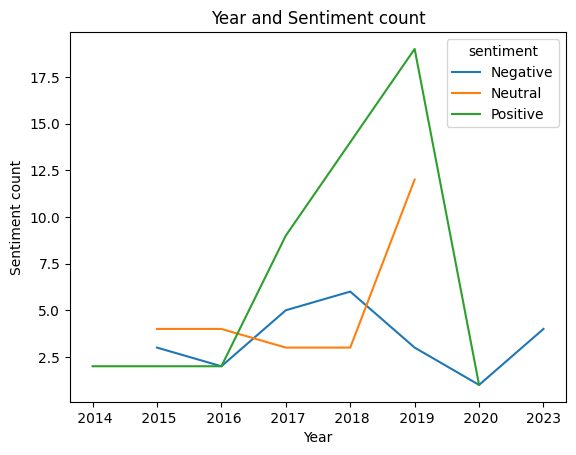

In [ ]:
df.groupby(['Year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

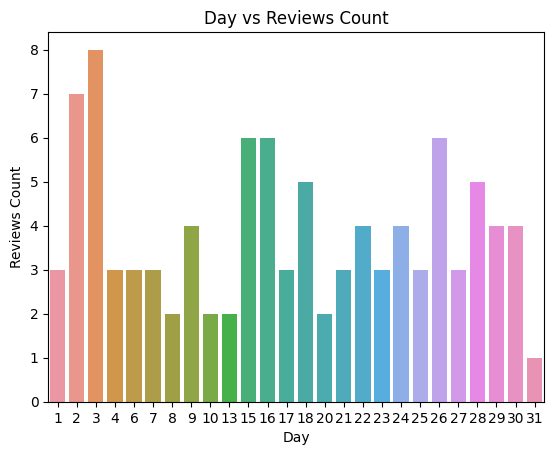

In [ ]:
import seaborn as sns
day=pd.DataFrame(df.groupby('Day')['Reviews'].count()).reset_index()
day['Day']=day['Day'].astype('int64')
day.sort_values(by=['Day'])
#Plotting the graph
sns.barplot(x="Day",y="Reviews",data=day)
plt.title('Day vs Reviews Count')
plt.xlabel('Day')
plt.ylabel('Reviews Count')
plt.show()

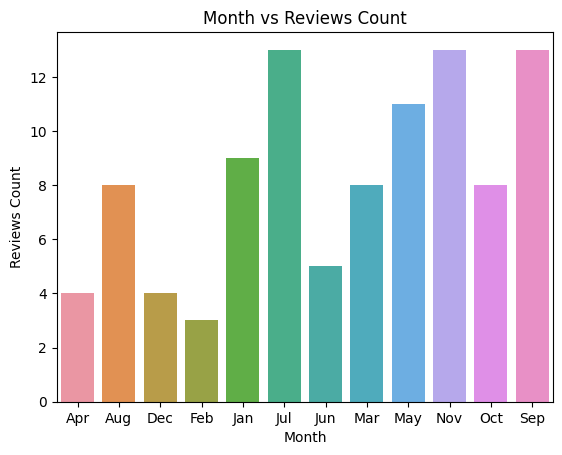

In [ ]:
import seaborn as sns
month=pd.DataFrame(df.groupby('Month')['Reviews'].count()).reset_index()
month.sort_values(by=['Month'])
#Plotting the graph
sns.barplot(x="Month",y="Reviews",data=month)
plt.title('Month vs Reviews Count')
plt.xlabel('Month')
plt.ylabel('Reviews Count')
plt.show()

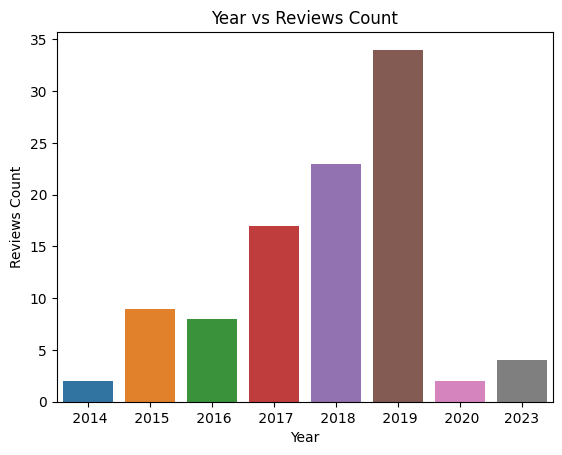

In [ ]:
import seaborn as sns
year=pd.DataFrame(df.groupby('Year')['Reviews'].count()).reset_index()
year.sort_values(by=['Year'])
#Plotting the graph
sns.barplot(x="Year",y="Reviews",data=year)
plt.title('Year vs Reviews Count')
plt.xlabel('Year')
plt.ylabel('Reviews Count')
plt.show()

In [ ]:
from textblob import TextBlob
df['polarity'] = df['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Reviews'].astype(str).apply(len)
df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split()))
df

Helpful  Rating       Location  \
0        20      5.0    Coimbatore   
1         3      4.0     Bangalore   
2        28      2.0     Hyderabad   
3         3      4.0    Aurangabad   
4        13      4.0      Palakkad   
..      ...      ...           ...   
94        0      2.0  Secunderabad   
95        3      4.0     Ghaziabad   
96        1      1.5     Ghaziabad   
97        1      3.0     Ghaziabad   
98        1      3.0     Ghaziabad   

                                              Reviews sentiment    Date  \
0   process smooth loan got sanctioned time loan a...  Positive  Jan 30   
1   loan process convenient but end documentation ...  Positive  Aug 26   
2   home loan taken but rate interest high disburs...  Negative  Jan 16   
3   taken home loan months processed directly time...  Positive  Nov 08   
4   took home loan ltd terms conditions liberal ti...  Positive  Sep 29   
..                                                ...       ...     ...   
94  rate interest high given interest rate applied...  Negative  Oct 10   
95  taken home loan process good loan amount lakhs...  Positive  Aug 30   
96  mandatory buy insurance customer issues not ha...  Negative  Dec 16   
97  process took one month home loan rate interest...   Neutral  Oct 04   
98  say others if negotiate rate charges home loan...   Neutral  Mar 09   

     Year Month Day  polarity  review_len  word_count  
0    2020   Jan  30  0.550000         120          18  
1    2019   Aug  26  0.833333         220          28  
2    2020   Jan  16  0.033750         189          27  
3    2019   Nov  08  0.400000         254          36  
4    2019   Sep  29  0.078125         244          34  
..    ...   ...  ..       ...         ...         ...  
94   2017   Oct  10  0.030000         135          20  
95   2018   Aug  30  0.200000         159          24  
96   2016   Dec  16  0.080000         194          30  
97   2016   Oct  04 -0.040000         186          28  
98   2016   Mar  09  0.080000         159          25  

[99 rows x 12 columns]

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
configure_plotly_browser_state()
df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [ ]:
configure_plotly_browser_state()
df['Rating '].iplot(
    kind='hist',
    bins=50,
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

In [ ]:
configure_plotly_browser_state()
df['review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [ ]:
configure_plotly_browser_state()
df['word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

In [ ]:
configure_plotly_browser_state()
from collections import defaultdict
import plotly.graph_objects as go
from plotly import tools
from wordcloud import WordCloud,STOPWORDS
#Filtering data
review_pos = df[df["sentiment"]=='Positive'].dropna()
review_neu = df[df["sentiment"]=='Neutral'].dropna()
review_neg = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
configure_plotly_browser_state()
freq_dict = defaultdict(int)
for sent in review_pos["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')



# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
configure_plotly_browser_state()
## Get the bar chart from positive reviews ##
for sent in review_pos["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["Reviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')




# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews", 
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



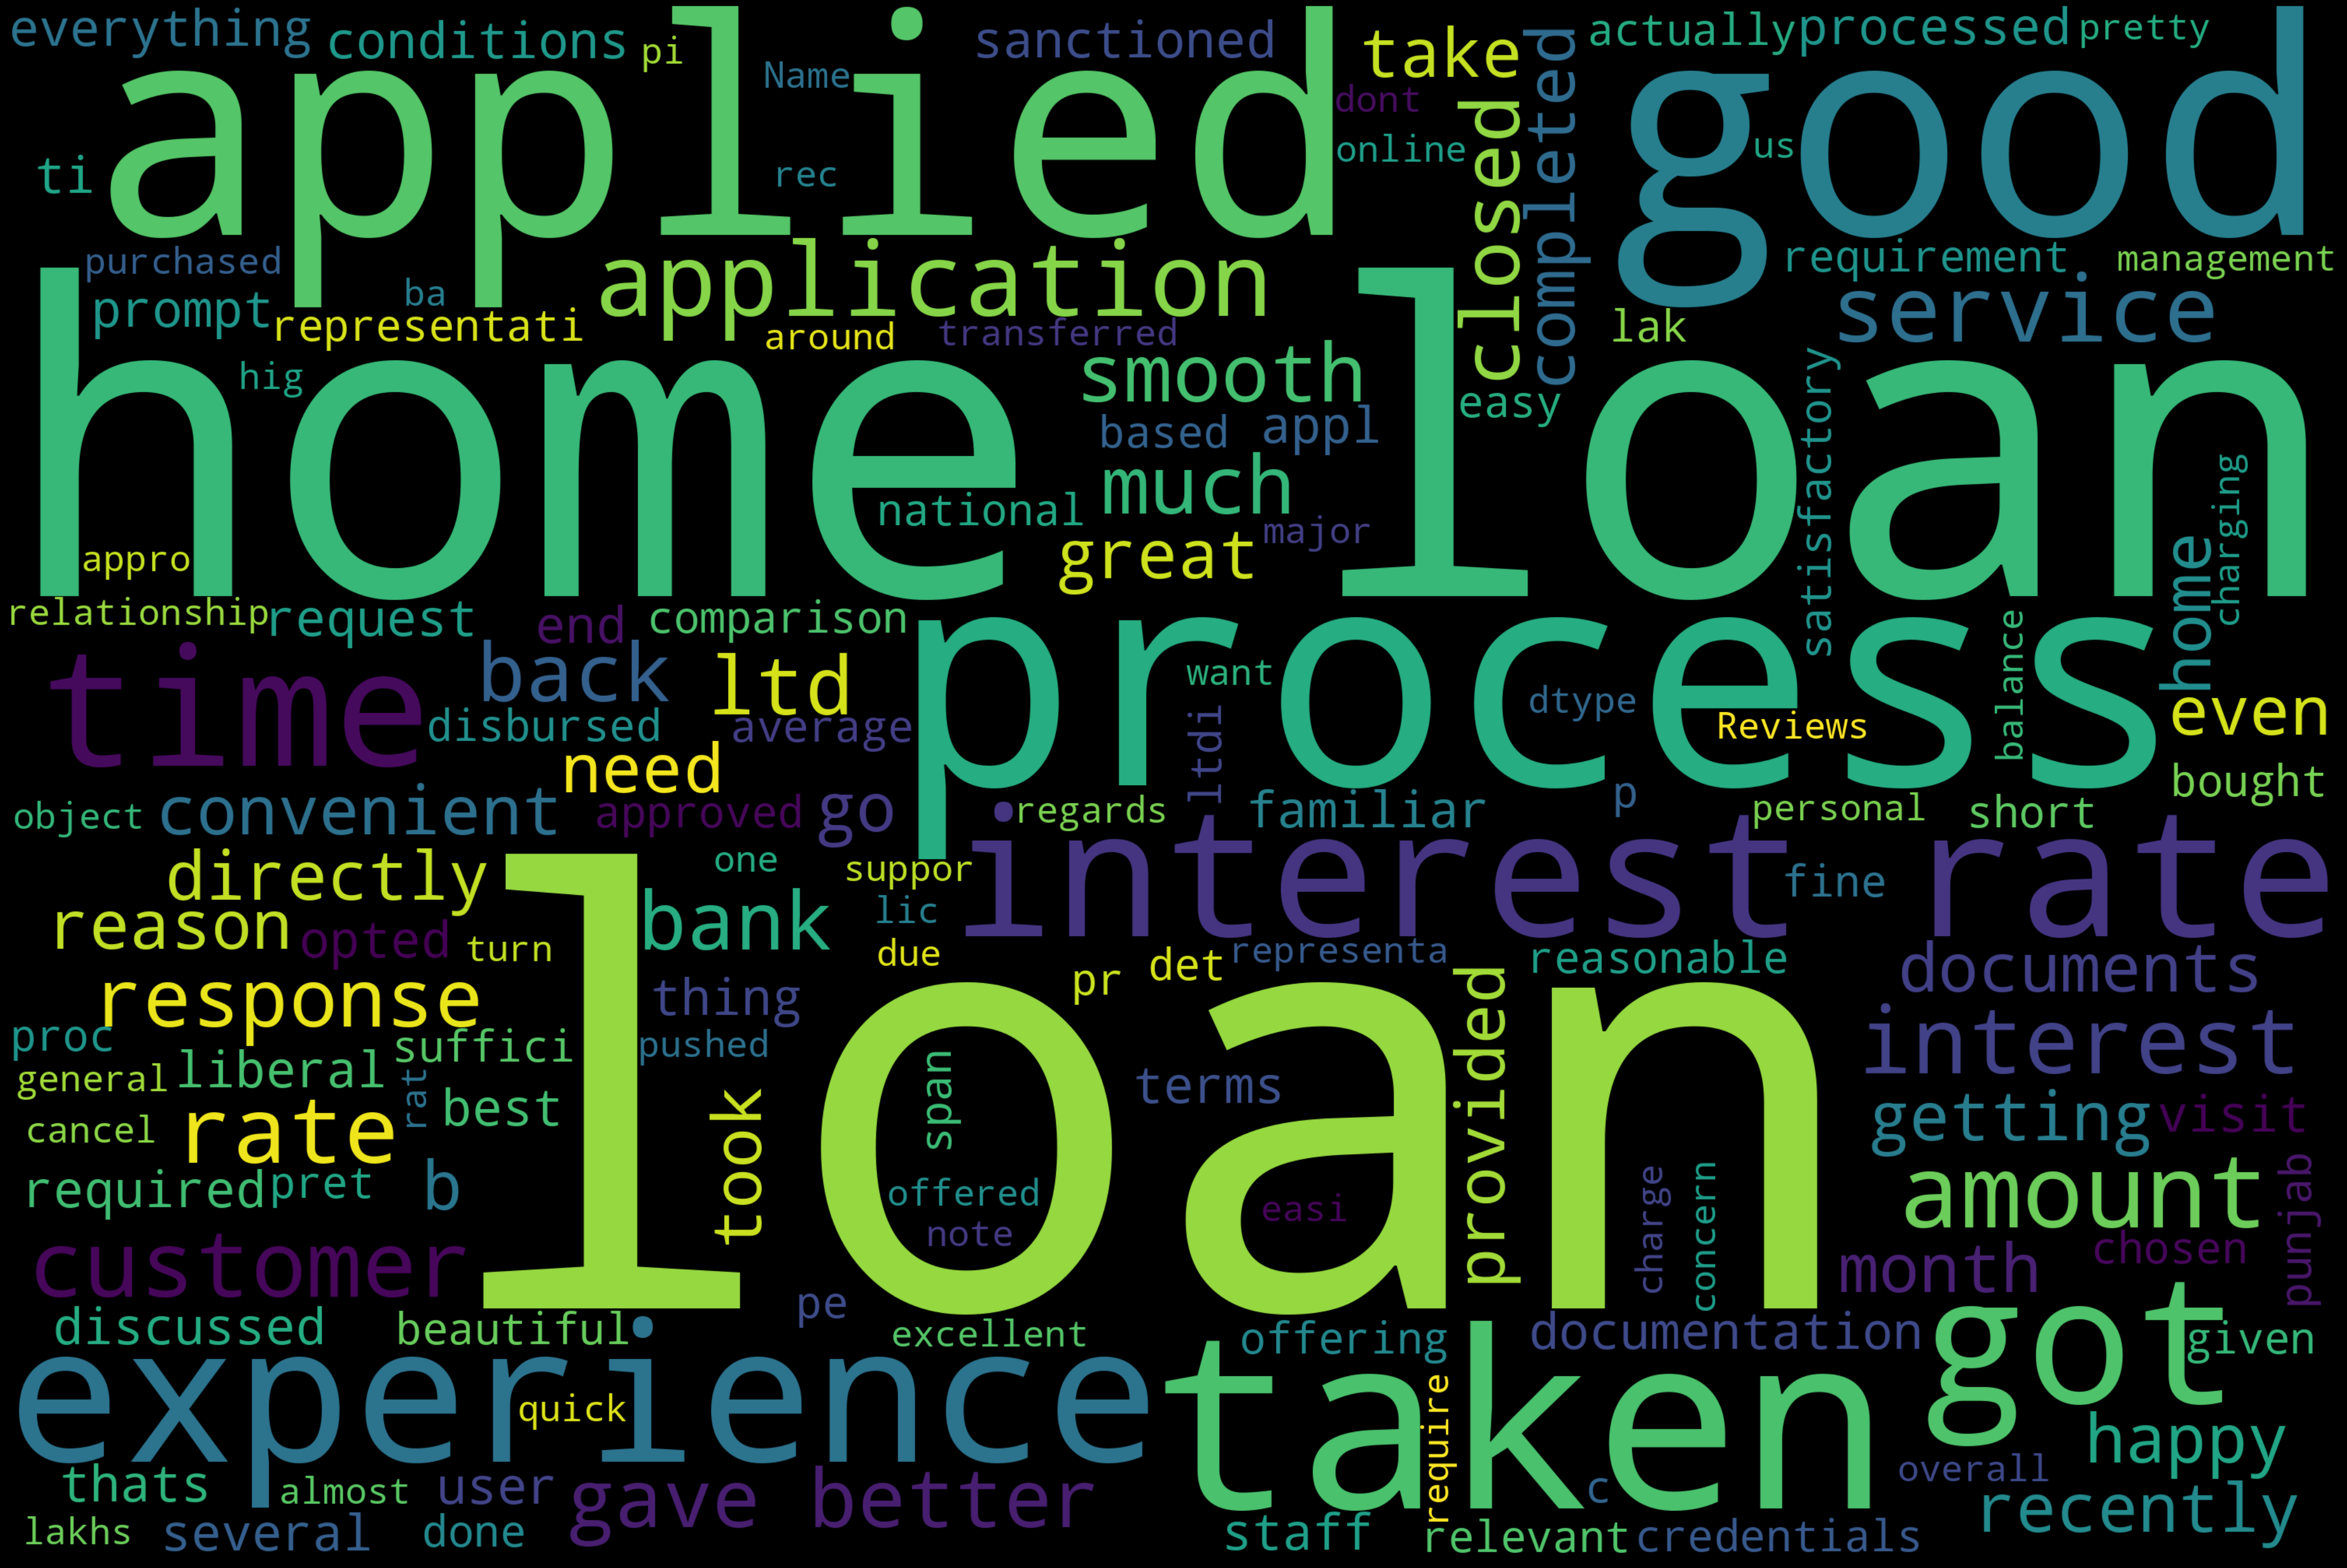

In [ ]:
text = review_pos["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

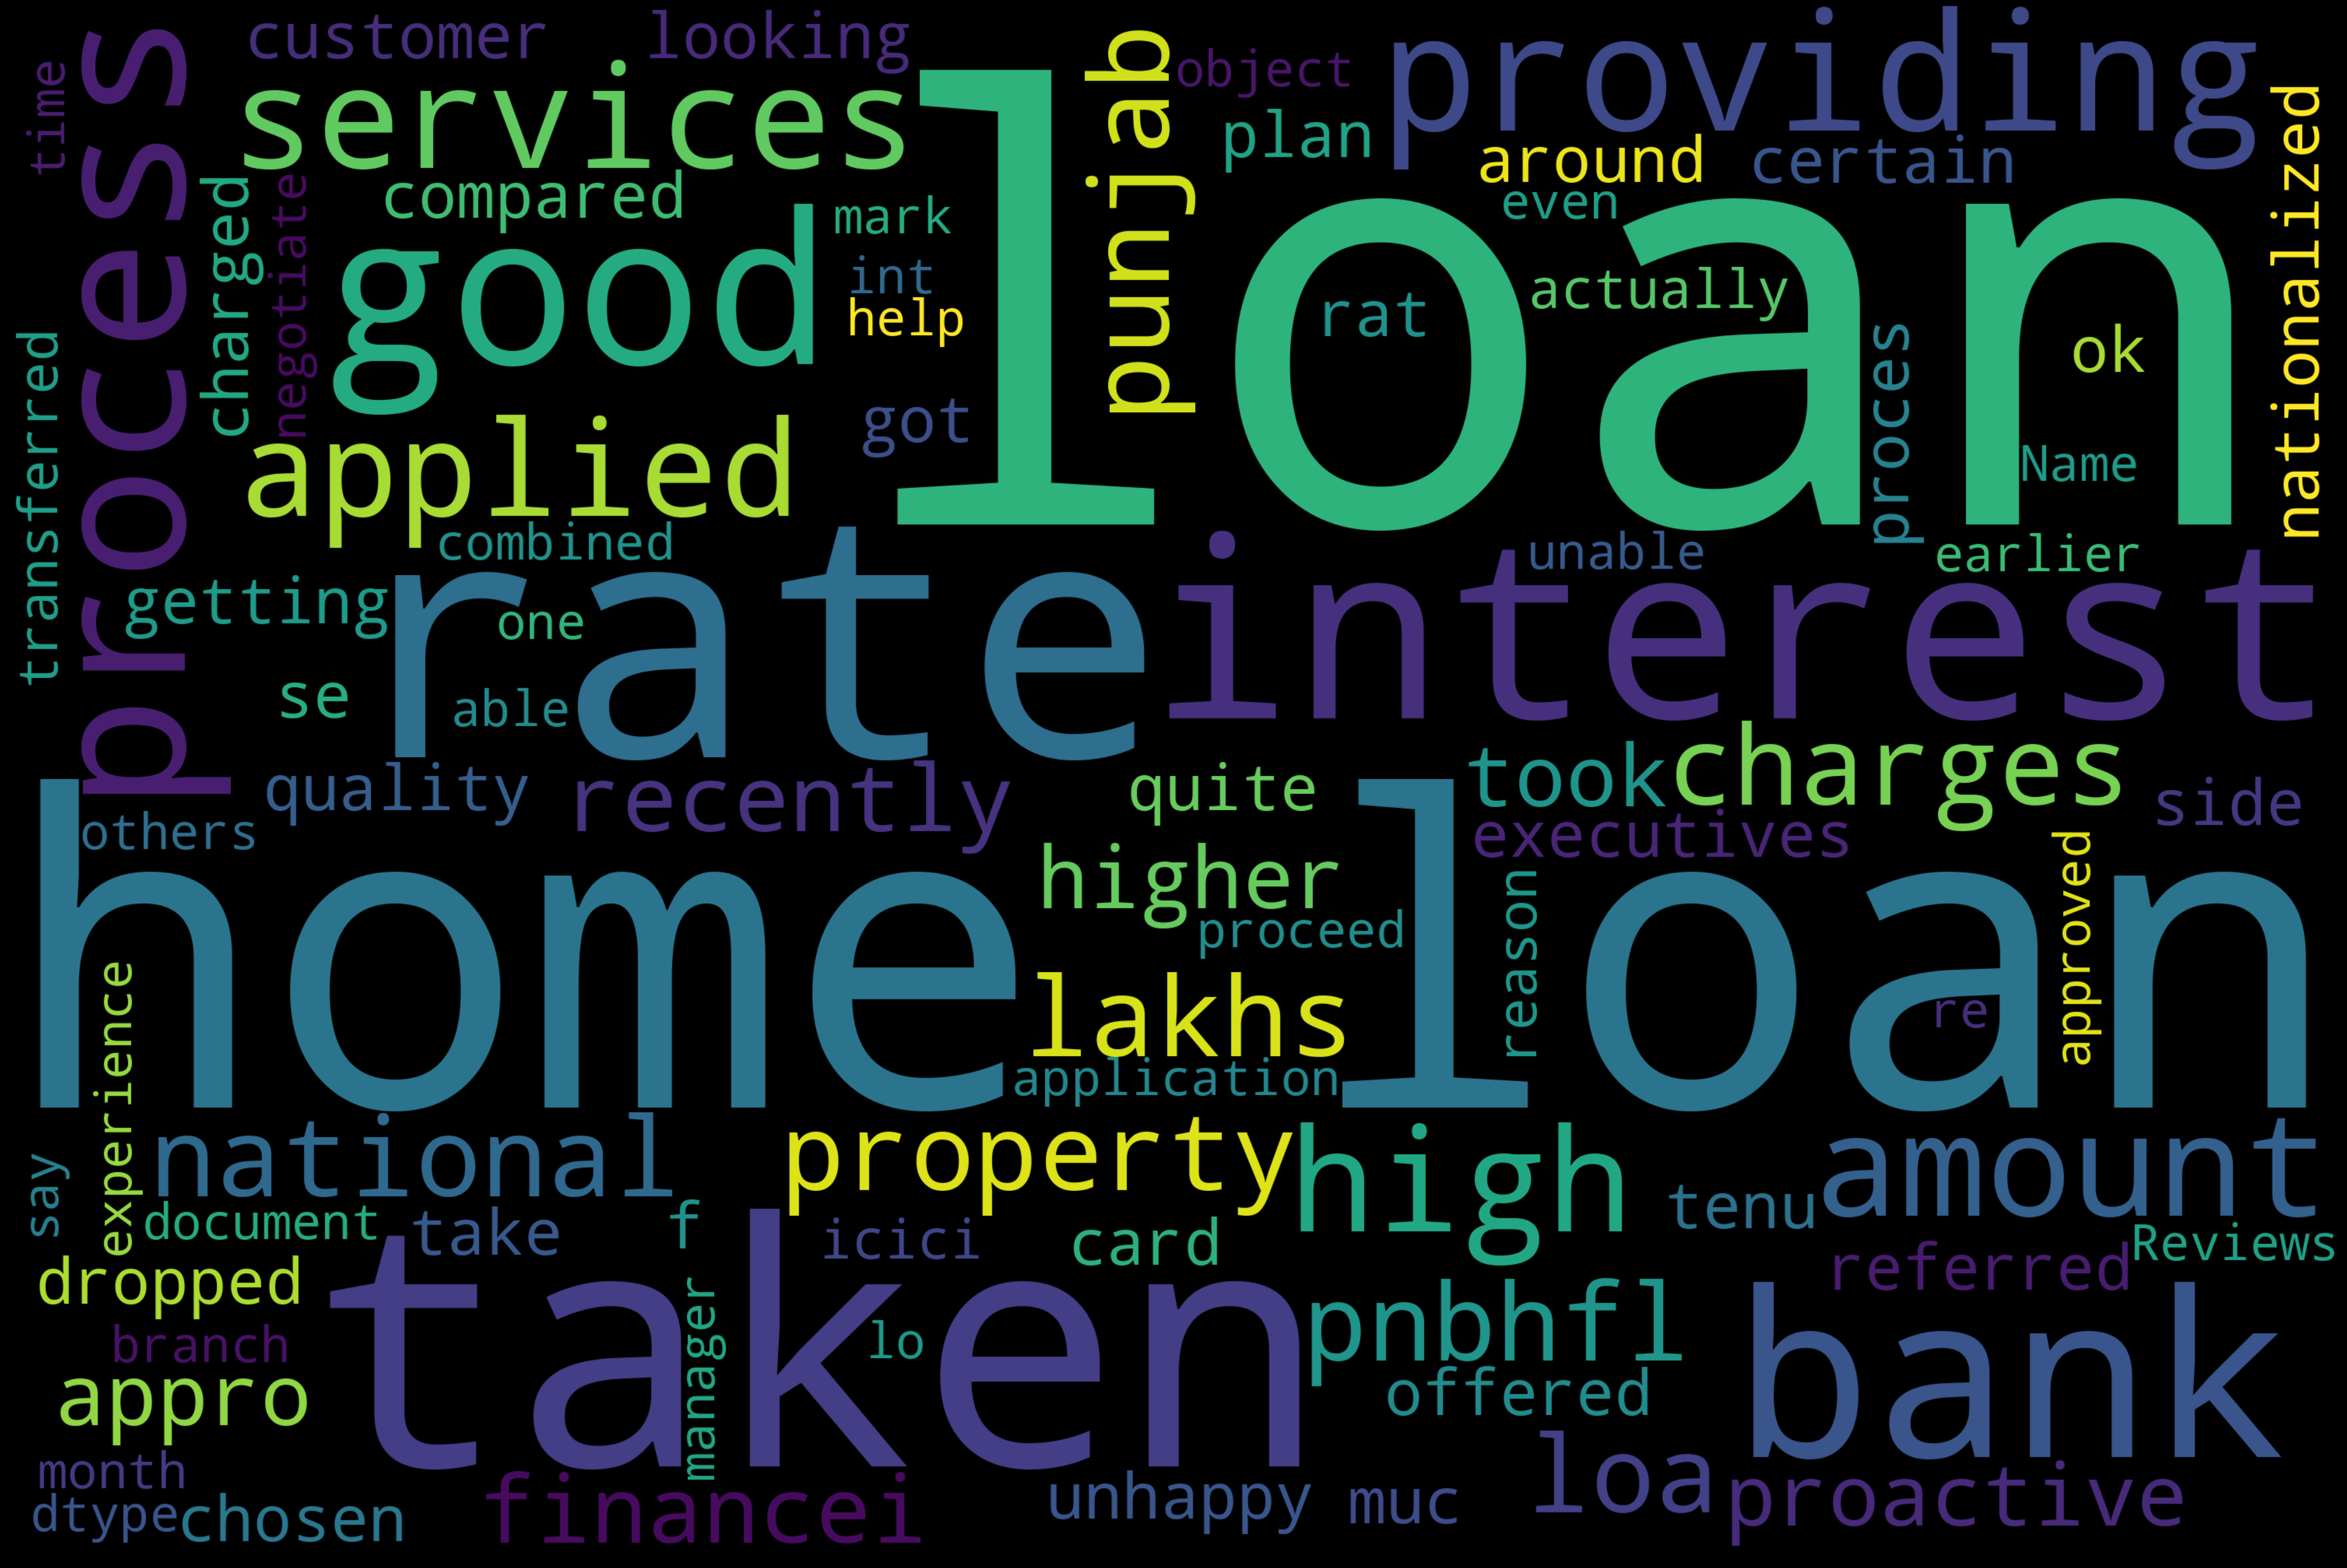

In [ ]:
text = review_neu["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

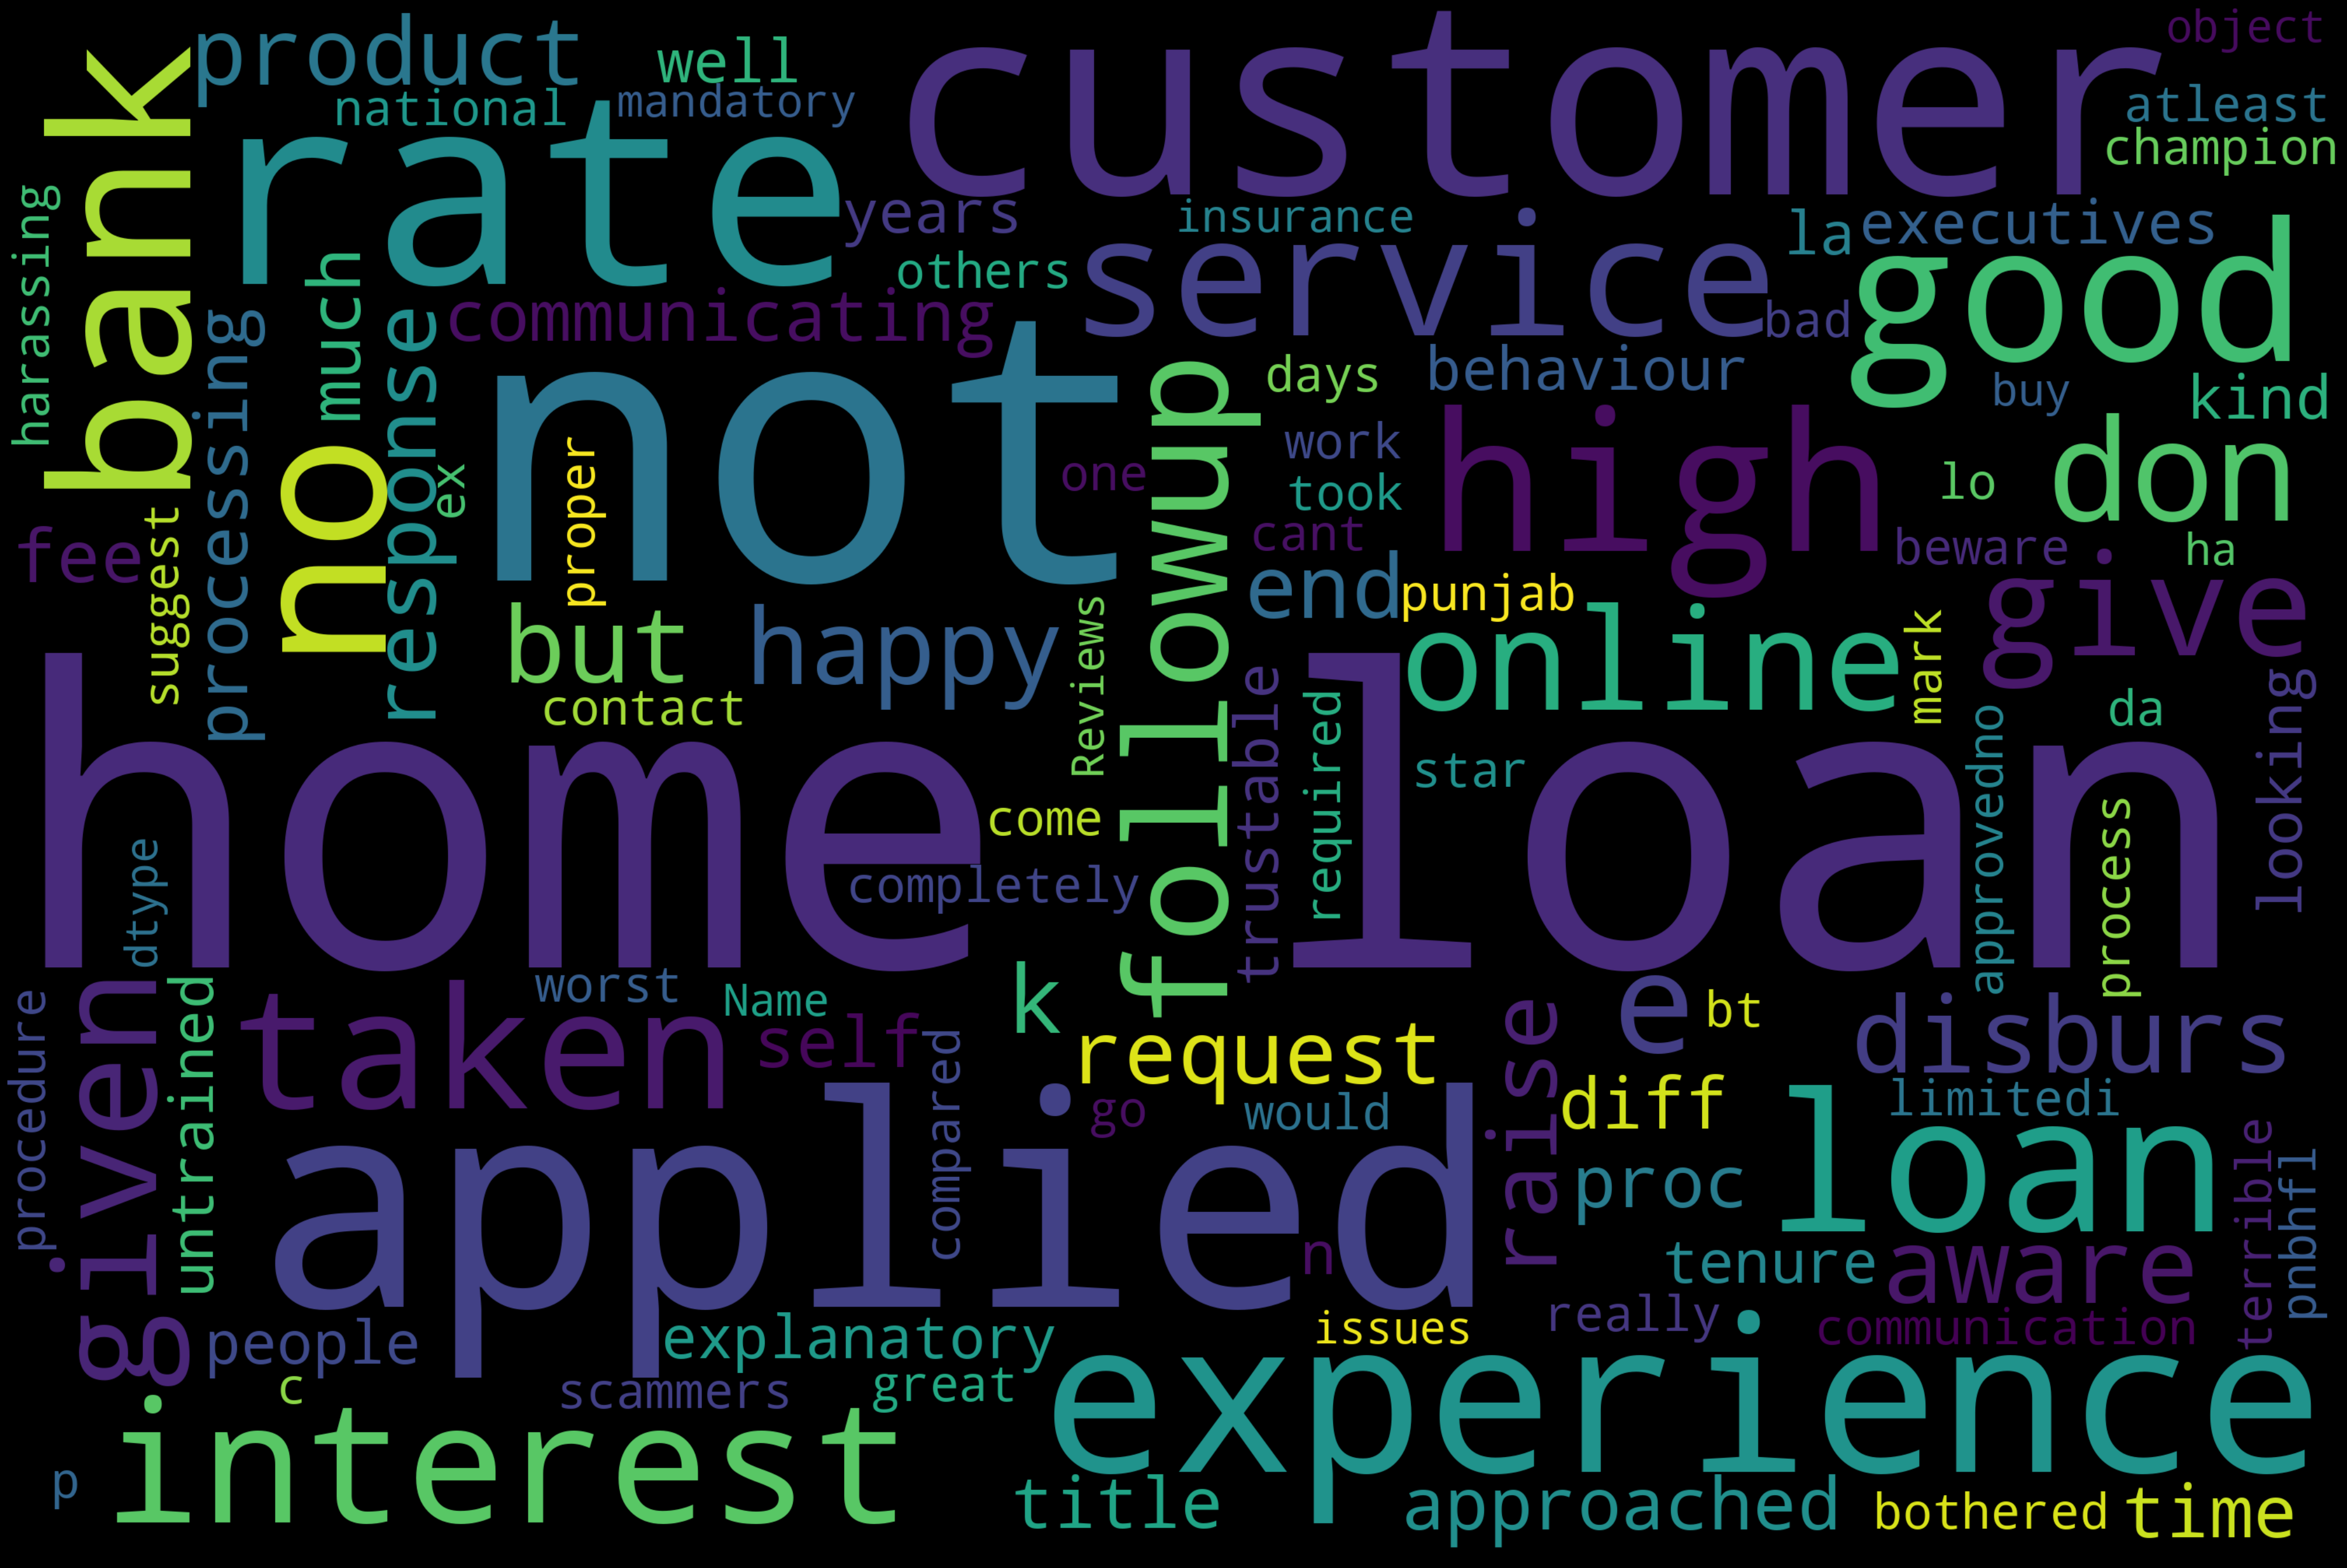

In [ ]:
text = review_neg["Reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'sentiment'. 
df['sentiment']= label_encoder.fit_transform(df['sentiment']) 
df['sentiment'].unique() 

array([2, 0, 1])

In [ ]:
df['sentiment'].value_counts()

2    49
1    26
0    24
Name: sentiment, dtype: int64

In [ ]:
review_features=df.copy()
review_features=review_features[['Reviews']].reset_index(drop=True)
review_features.head()

Reviews
0  process smooth loan got sanctioned time loan a...
1  loan process convenient but end documentation ...
2  home loan taken but rate interest high disburs...
3  taken home loan months processed directly time...
4  took home loan ltd terms conditions liberal ti...

In [ ]:
#Performing stemming on the review dataframe
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['Reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)  

In [ ]:
corpus[3]

'taken home loan month process directli time need money bank need document submit verif but process good ask submit requir document need but sanction amount l tenur period year rate interest float pre closur option applicablegreat'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['Reviews'])

In [ ]:
X.shape

(99, 1000)

In [ ]:
y=df['sentiment']
y

0     2
1     2
2     0
3     2
4     2
     ..
94    0
95    2
96    0
97    1
98    1
Name: sentiment, Length: 99, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')


Original dataset shape : Counter({2: 49, 1: 26, 0: 24})
Resampled dataset shape Counter({2: 49, 0: 49, 1: 49})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.5544444444444444
Decision Tree Test Accuracy: 0.6066666666666667
KNN Test Accuracy: 0.49222222222222217
SVC Test Accuracy: 0.5544444444444444
Naive Bayes Test Accuracy: 0.5644444444444444


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=232.99518105153672, random_state=0)
The mean accuracy of the model is: 0.8918918918918919


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [ ]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


Confusion matrix, without normalization


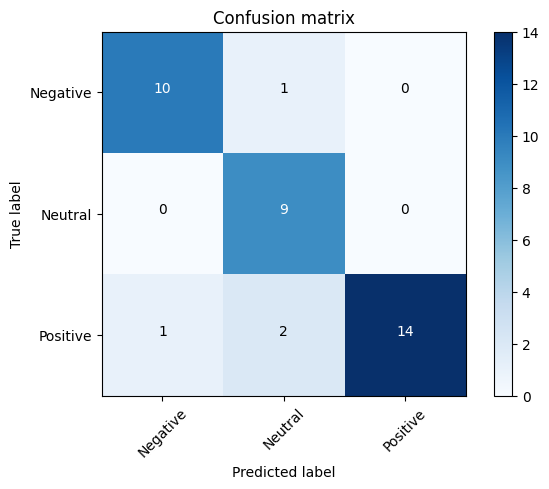

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.75      1.00      0.86         9
           2       1.00      0.82      0.90        17

    accuracy                           0.89        37
   macro avg       0.89      0.91      0.89        37
weighted avg       0.91      0.89      0.89        37



<ipython-input-56-e5ecf358c7db>:37: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



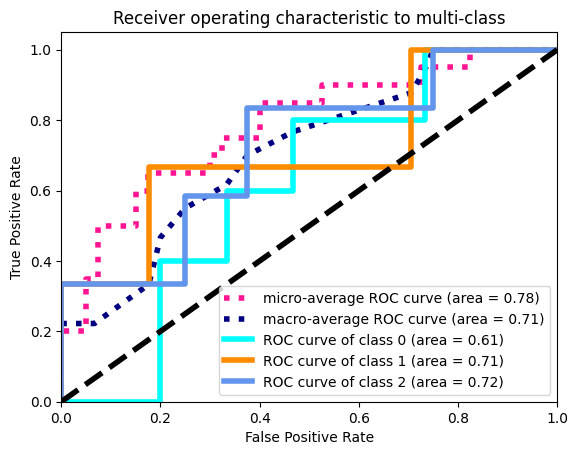

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
